In [11]:
import numpy as np
import pandas as pd
import librosa
from scipy.signal import stft
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Laad de fragmenten data
fragmenten_df = pd.read_csv('Data/fragments_data.csv')
train_data, test_data = train_test_split(fragmenten_df, test_size=0.3, random_state=42)
test_data.head()

features = []
for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    _, _, Zxx = stft(y, sr, nperseg=1024)
    stft_mean = np.mean(np.abs(Zxx))
    stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))
    feature_vector = np.concatenate([mfcc_mean, [stft_mean], [stft_librosa_mean]])
    features.append(feature_vector)

features = np.array(features)
scaler = StandardScaler()
features = scaler.fit_transform(features)


c:\Users\irisp\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\irisp\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\irisp\anaconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1240: UserWarning: nperseg = 1024 is greater than input length  = 369, using nperseg = 369
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,
c:\Users\irisp\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\irisp\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\irisp\anaconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1240: UserWarning: nperseg = 1024 is greater than input l

Accuracy: 0.6818181818181818
                        precision    recall  f1-score   support

amerikaanse oeverloper       0.00      0.00      0.00         1
        geelpootruiter       0.50      0.80      0.62         5
     grauwe franjepoot       0.40      0.67      0.50         3
            oeverloper       0.59      0.68      0.63        76
            steenloper       0.50      1.00      0.67         1
              tureluur       0.83      0.80      0.82       122
             watersnip       0.69      0.80      0.74        44
                witgat       0.53      0.53      0.53        53
         zwarte ruiter       0.74      0.43      0.54        47

              accuracy                           0.68       352
             macro avg       0.53      0.63      0.56       352
          weighted avg       0.69      0.68      0.68       352



c:\Users\irisp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\irisp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\irisp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


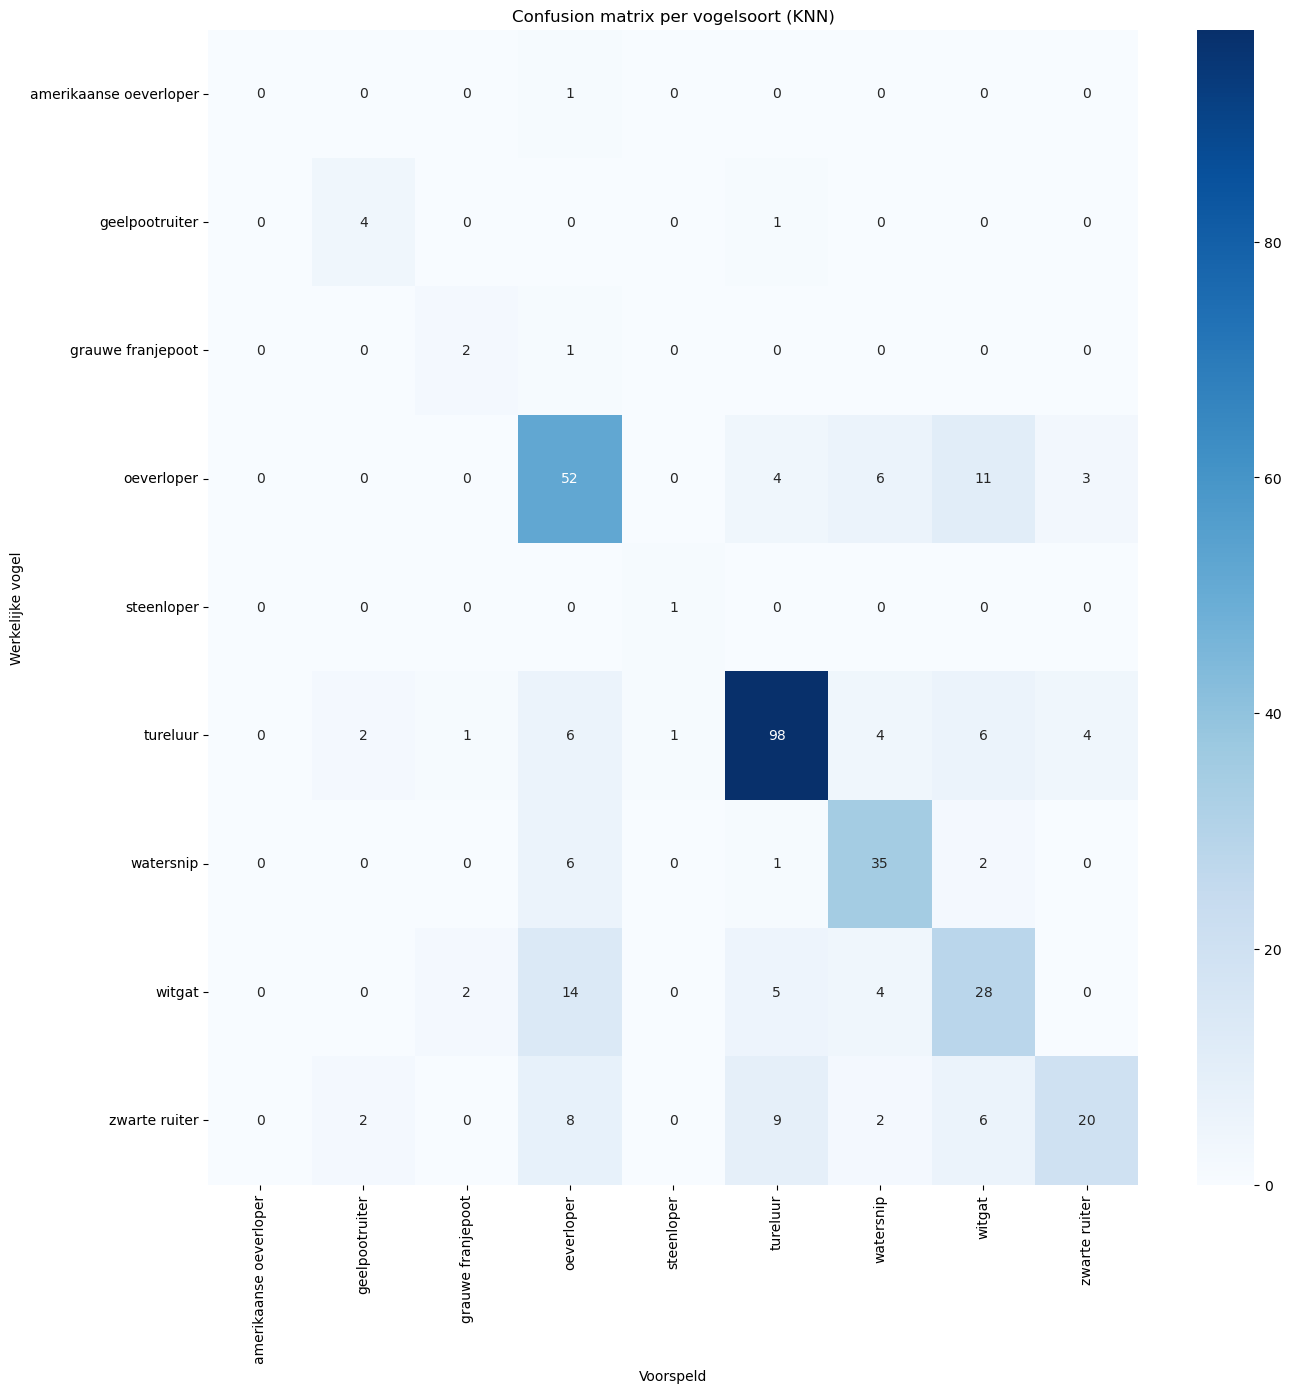

In [12]:
# Gebruik de vogelsoortnaam als label
X = features
y = test_data['labels']  # <-- gebruik de kolom met de soortnaam

# Train test split maken 70% test 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNeighborsClassifier trainen (bijvoorbeeld met k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Voorspellingen maken
y_pred = knn.predict(X_test)

# Evaluatie
print("Accuracy:", accuracy_score(y_test, y_pred))

# Unieke vogelsoorten bepalen
unique_labels = np.unique(np.concatenate([y_test, y_pred]))

print(classification_report(y_test, y_pred, labels=unique_labels, target_names=unique_labels))

# Confusion matrix tonen per vogelsoort
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Voorspeld')
plt.ylabel('Werkelijke vogel')
plt.title('Confusion matrix per vogelsoort (KNN)')
plt.show()

In [13]:
import numpy as np
import librosa
from collections import Counter

# Parameters
window_duration = 2  # seconden
hop_duration = 1   # overlap van 50%

# Laad het fragment
nieuw_fragment = input("Geef het pad naar het nieuwe vogelgeluid (bijv. audio_files/test/XC809979 - European Nightjar - Caprimulgus europaeus.mp3): ")
y_new, sr_new = librosa.load(nieuw_fragment, sr=None)

window_length = int(window_duration * sr_new)
hop_length = int(hop_duration * sr_new)

predictions = []

for start in range(0, len(y_new) - window_length + 1, hop_length):
    y_window = y_new[start:start + window_length]
    mfcc = librosa.feature.mfcc(y=y_window, sr=sr_new, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    _, _, Zxx = stft(y_window, sr_new, nperseg=1024)
    stft_mean = np.mean(np.abs(Zxx))
    stft_librosa = librosa.stft(y_window, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))
    feature_vector = np.concatenate([mfcc_mean, [stft_mean], [stft_librosa_mean]])
    feature_vector_scaled = scaler.transform([feature_vector])
    voorspelde_vogel = knn.predict(feature_vector_scaled)[0]
    predictions.append(voorspelde_vogel)

# Toon de voorspellingen per fragment
print("Voorspellingen per venster:", predictions)

# Meest voorkomende vogelsoort als eindresultaat
meest_voorkomend = Counter(predictions).most_common(1)[0][0]
print(f"Meest voorkomende voorspelde vogelsoort: {meest_voorkomend}")

Voorspellingen per venster: ['tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'watersnip', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur', 'tureluur']
Meest voorkomende voorspelde vogelsoort: tureluur
